___

# Rossmann prediction project


check also: https://medium.com/saturdays-ai/my-data-science-template-for-python-59a67cba4290

# Import Libraries

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
import os
print(os.getcwd())
os.chdir('C:\\Users\\Administrator\\Desktop\\raphi_other\\repositories\\data-science-project-template\\data\\01_raw\\archive')

C:\Users\Administrator\Desktop\raphi_other\repositories\data-science-project-template\notebooks\01_exploration


In [265]:
print(os.getcwd())
df = pd.read_csv('train.csv')
store_df = pd.read_csv('store.csv')
test_df = pd.read_csv('test.csv')

C:\Users\Administrator\Desktop\raphi_other\repositories\data-science-project-template\data\01_raw\archive


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17268\580288884.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [135]:
#Reduce dataframe memory usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

** Check out the info(), head(), and describe() methods on XXX.**

In [267]:
#df = reduce_mem_usage(df)
#store_df = reduce_mem_usage(store_df)
test_df = reduce_mem_usage(test_df)

Memory usage of dataframe is 2.51 MB
Memory usage after optimization is: 0.51 MB
Decreased by 79.6%


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype   
---  ------         --------------    -----   
 0   Store          1017209 non-null  int16   
 1   DayOfWeek      1017209 non-null  int8    
 2   Date           1017209 non-null  category
 3   Sales          1017209 non-null  int32   
 4   Customers      1017209 non-null  int16   
 5   Open           1017209 non-null  int8    
 6   Promo          1017209 non-null  int8    
 7   StateHoliday   1017209 non-null  category
 8   SchoolHoliday  1017209 non-null  int8    
dtypes: category(2), int16(2), int32(1), int8(4)
memory usage: 14.6 MB


In [269]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             41088 non-null  int32   
 1   Store          41088 non-null  int16   
 2   DayOfWeek      41088 non-null  int8    
 3   Date           41088 non-null  category
 4   Open           41077 non-null  float16 
 5   Promo          41088 non-null  int8    
 6   StateHoliday   41088 non-null  category
 7   SchoolHoliday  41088 non-null  int8    
dtypes: category(2), float16(1), int16(1), int32(1), int8(3)
memory usage: 523.3 KB


In [143]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [145]:
print('The dataframe has {} columns and {} rows'.format(df.shape[1],df.shape[0]))

The dataframe has 9 columns and 1017209 rows


In [147]:
df.describe().round()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0
mean,558.0,4.0,5774.0,633.0,1.0,0.0,0.0
std,322.0,2.0,3850.0,464.0,0.0,0.0,0.0
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,280.0,2.0,3727.0,405.0,1.0,0.0,0.0
50%,558.0,4.0,5744.0,609.0,1.0,0.0,0.0
75%,838.0,6.0,7856.0,837.0,1.0,1.0,0.0
max,1115.0,7.0,41551.0,7388.0,1.0,1.0,1.0


In [271]:
test_df.describe().round()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.0,41088.0,41088.0,41077.0,41088.0,41088.0
mean,20544.0,556.0,4.0,1.0,0.0,0.0
std,11861.0,320.0,2.0,0.0,0.0,0.0
min,1.0,1.0,1.0,0.0,0.0,0.0
25%,10273.0,280.0,2.0,1.0,0.0,0.0
50%,20544.0,554.0,4.0,1.0,0.0,0.0
75%,30816.0,832.0,6.0,1.0,1.0,1.0
max,41088.0,1115.0,7.0,1.0,1.0,1.0


In [281]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [149]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]

#check for count of missing values in each columns
df[cols_with_missing].isnull().sum()

#df_combined = df_combined.dropna(axis=0) #axis=0 is row, axis=1 is column

Series([], dtype: float64)

In [157]:
df_combined = pd.merge(df, store_df, on='Store', how='left')

In [151]:
import pandas as pd

def summarize_dataframe(df):
    summary_list = []  # List to store summary information

    for column in df.columns:
        unique_values = df[column].unique()
        summary_list.append({
            'Column': column,
            'Data Type': df[column].dtype,
            'Unique Values': df[column].nunique(),
            'Missing Values': df[column].isnull().sum(),
            'Sample Unique Values': unique_values[:5] if len(unique_values) > 5 else unique_values
        })

    # Convert the list of dictionaries into a DataFrame
    summary_df = pd.DataFrame(summary_list)

    return summary_df


In [159]:
for column in df_combined.columns:
    print(df_combined[column].unique())

[   1    2    3 ... 1113 1114 1115]
[5 4 3 2 1 7 6]
['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28', '2015-07-27', ..., '2013-01-05', '2013-01-04', '2013-01-03', '2013-01-02', '2013-01-01']
Length: 942
Categories (942, object): ['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', ..., '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31']
[ 5263  6064  8314 ...   660 17815 23303]
[ 555  625  821 ... 3900   36 4065]
[1 0]
[1 0]
['0', 'a', 'b', 'c', 0]
Categories (5, object): [0, '0', 'a', 'b', 'c']
[1 0]
['c', 'a', 'd', 'b']
Categories (4, object): ['a', 'b', 'c', 'd']
['a', 'c', 'b']
Categories (3, object): ['a', 'b', 'c']
[1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 

In [187]:
# Generate the summary for your dataframe
summary_df = summarize_dataframe(df_combined)

summary_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

,Column,Data Type,Unique Values,Missing Values,Sample Unique Values
0,Store,int16,1115,0,[1 2 3 4 5]
1,DayOfWeek,int8,7,0,[5 4 3 2 1]
2,Date,category,942,0,"['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28', '2015-07-27'] Categories (942, object): ['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', ..., '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31']"
3,Sales,int32,21734,0,[ 5263 6064 8314 13995 4822]
4,Customers,int16,4086,0,[ 555 625 821 1498 559]
5,Open,int8,2,0,[1 0]
6,Promo,int8,2,0,[1 0]
7,StateHoliday,category,5,0,"['0', 'a', 'b', 'c', 0] Categories (5, object): [0, '0', 'a', 'b', 'c']"
8,SchoolHoliday,int8,2,0,[1 0]
9,StoreType,category,4,0,"['c', 'a', 'd', 'b'] Categories (4, object): ['a', 'b', 'c', 'd']"


In [167]:
df_combined.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [183]:
cols_with_missing = [col for col in df_combined.columns if df_combined[col].isnull().any()]

print(df_combined.shape)
#check for count of missing values in each columns
df_combined[cols_with_missing].isnull().sum()

(1017209, 13)


CompetitionDistance    2642
dtype: int64

In [185]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   Store                1017209 non-null  int16   
 1   DayOfWeek            1017209 non-null  int8    
 2   Date                 1017209 non-null  category
 3   Sales                1017209 non-null  int32   
 4   Customers            1017209 non-null  int16   
 5   Open                 1017209 non-null  int8    
 6   Promo                1017209 non-null  int8    
 7   StateHoliday         1017209 non-null  category
 8   SchoolHoliday        1017209 non-null  int8    
 9   StoreType            1017209 non-null  category
 10  Assortment           1017209 non-null  category
 11  CompetitionDistance  1014567 non-null  float32 
 12  Promo2               1017209 non-null  int8    
dtypes: category(4), float32(1), int16(2), int32(1), int8(5)
memory usage: 21.4 MB


In [193]:
print(df_combined.shape)

df_combined = df_combined.dropna(axis=0) #axis=0 is row, axis=1 is column
print(df_combined.shape)

(1014567, 13)
(1014567, 13)


CompetitionDistance    0
dtype: int64

In [201]:

# Select only numerical columns
numerical_df = df_combined.select_dtypes(include=[np.number])

print(numerical_df.head())

print("Numerical Columns:")
print(numerical_df.columns.tolist())

corr_matrix = numerical_df.corr()

   Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5   5263        555     1      1              1   
1      2          5   6064        625     1      1              1   
2      3          5   8314        821     1      1              1   
3      4          5  13995       1498     1      1              1   
4      5          5   4822        559     1      1              1   

   CompetitionDistance  Promo2  
0               1270.0       0  
1                570.0       1  
2              14130.0       1  
3                620.0       0  
4              29910.0       0  
Numerical Columns:
['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'Promo2']


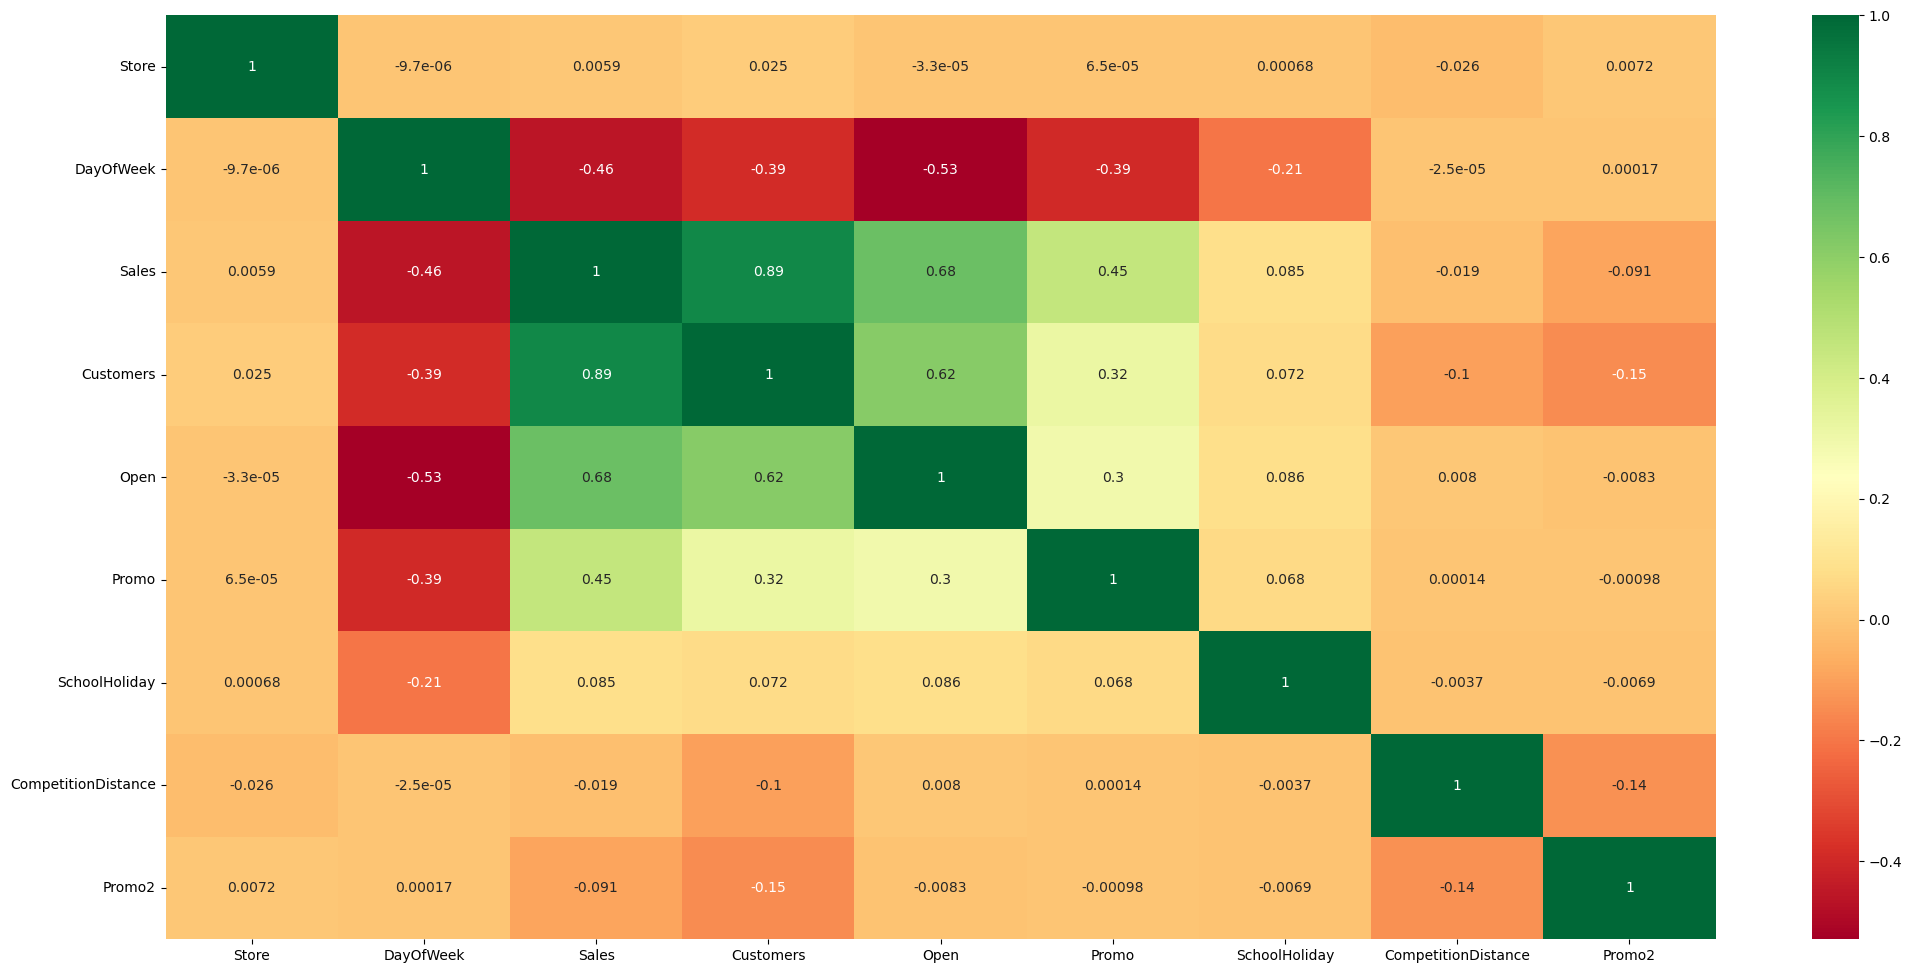

In [205]:
corrmat = numerical_df.corr()   #get correlations table
top_corr_features = corrmat.index
plt.figure(figsize=(25,12))
g=sns.heatmap(numerical_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")   #plot heat map

In [283]:
columns_to_drop = ['Promo2', 'CompetitionDistance', 'SchoolHoliday']
more = ['StateHoliday', 'Date']
even_more = ['Customers']

#df_combined = df_combined.drop(columns=even_more, axis=1)

df_combined.head()

,Store,DayOfWeek,Sales,Open,Promo,StoreType,Assortment
0,1,5,5263,1,1,c,a
1,2,5,6064,1,1,a,a
2,3,5,8314,1,1,a,a
3,4,5,13995,1,1,c,c
4,5,5,4822,1,1,a,a


In [285]:
df_combined.describe().round()

,Store,DayOfWeek,Sales,Open,Promo
count,1014567.0,1014567.0,1014567.0,1014567.0,1014567.0
mean,558.0,4.0,5777.0,1.0,0.0
std,322.0,2.0,3851.0,0.0,0.0
min,1.0,1.0,0.0,0.0,0.0
25%,280.0,2.0,3732.0,1.0,0.0
50%,558.0,4.0,5748.0,1.0,0.0
75%,837.0,6.0,7859.0,1.0,1.0
max,1115.0,7.0,41551.0,1.0,1.0


In [337]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
def plot_distribution(df, column_name):
    plt.figure(figsize=(10, 6))
    
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # For numerical columns, use histogram, boxplot, and density plot
        plt.subplot(1, 2, 1)
        sns.histplot(df[column_name].dropna(), kde=True, color='skyblue')
        plt.title(f'Histogram of {column_name}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column_name], color='lightgreen')
        plt.title(f'Boxplot of {column_name}')
        
    else:
        # For categorical columns, use bar plot
        sns.countplot(y=df[column_name], palette="viridis", order=df[column_name].value_counts().index)
        plt.title(f'Bar Plot of {column_name}')
        
    plt.tight_layout()
    plt.show()

# Example usage with a DataFrame 'df' and a column name 'Sales'


In [291]:
pct = np.percentile(df_combined.loc[:, 'Sales'].fillna(np.mean(df_combined.loc[:, 'Sales'])), 95)
print(pct)


df_combined = df_combined.loc[df_combined.loc[:, 'Sales'] < pct]

12140.0


In [297]:
df_combined.describe()

,Store,DayOfWeek,Sales,Open,Promo
count,963827.000000,963827.000000,963827.000000,963827.00000,963827.000000
mean,557.506322,4.059550,5280.788513,0.82117,0.362721
std,323.617536,1.988188,3190.835187,0.38321,0.480785
min,1.000000,1.000000,0.000000,0.00000,0.000000
25%,276.000000,2.000000,3579.000000,1.00000,0.000000
50%,558.000000,4.000000,5570.000000,1.00000,0.000000
75%,840.000000,6.000000,7477.000000,1.00000,1.000000
max,1115.000000,7.000000,12139.000000,1.00000,1.000000


In [301]:
df_combined.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StoreType',
       'Assortment'],
      dtype='object')

In [303]:
test_df.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854492,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352783,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [305]:
#set X and y

X = df_combined.drop('Sales',axis=1)
y = df_combined.Sales

In [327]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X.columns if X[cname].nunique() < 5 and X[cname].dtype == "category"]

# Select numerical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int16', 'int8', 'int32']]

In [317]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963827 entries, 0 to 1017208
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Store       963827 non-null  int16   
 1   DayOfWeek   963827 non-null  int8    
 2   Sales       963827 non-null  int32   
 3   Open        963827 non-null  int8    
 4   Promo       963827 non-null  int8    
 5   StoreType   963827 non-null  category
 6   Assortment  963827 non-null  category
dtypes: category(2), int16(1), int32(1), int8(3)
memory usage: 17.5 MB


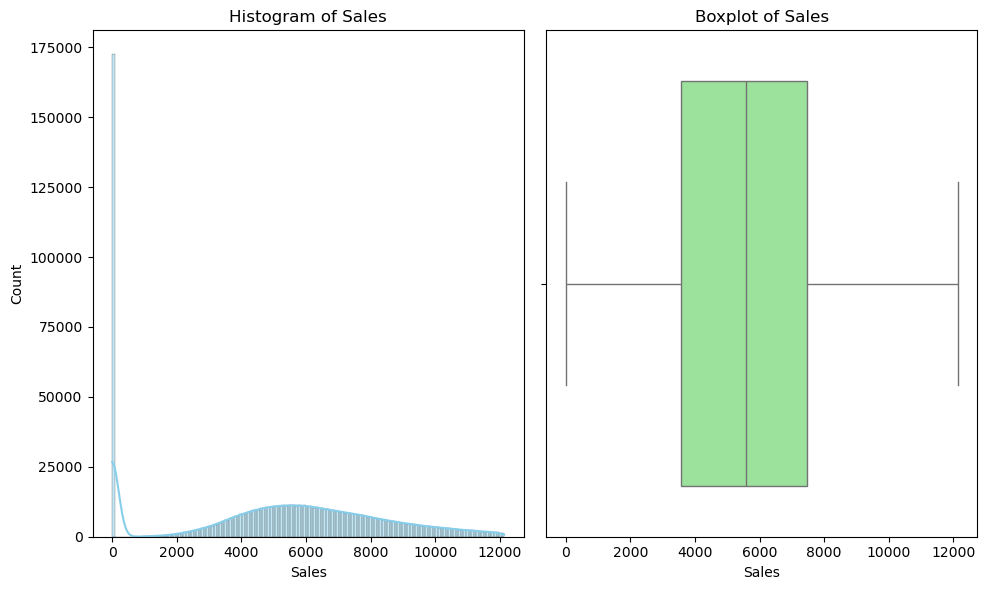

In [309]:
plot_distribution(df_combined, 'Sales')

In [345]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [347]:
#create numerical transformer
numerical_transformer = Pipeline([('scaler', StandardScaler()) ])

#create categorical transformer
categorical_transformer = Pipeline(steps=[ ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                            ])

In [349]:
print(categorical_cols)

['StoreType', 'Assortment']


In [351]:
print(numerical_cols)

['Store', 'DayOfWeek', 'Open', 'Promo']


In [353]:
#column transformer
preprocessor = ColumnTransformer(
                                transformers=[
                                    ('num', numerical_transformer, numerical_cols),
                                    ('cat', categorical_transformer, categorical_cols)
    ])

In [355]:
lr = LinearRegression()

In [357]:
#model pipeline
lr_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('linear_model', lr)
                             ])

# Preprocessing of training data, fit model 
lr_pipe.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
lr_preds = lr_pipe.predict(X_test)

# Evaluate the model
score = mean_absolute_error(y_test, lr_preds)
print('Mean Absolute Error for linear regression Model', score)

Mean Absolute Error for linear regression Model 1394.9624709981797


In [368]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Get the processed features from the preprocessor
X_train_transformed = lr_pipe.named_steps['preprocessor'].transform(X_train)

# Get feature names after preprocessing
feature_names = lr_pipe.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame with the transformed features
X_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_transformed_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_transformed_df.values, i) for i in range(X_transformed_df.shape[1])]

# Display VIF data
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variance Inflation Factor (VIF) for each feature:
              Feature       VIF
0          num__Store  1.005545
1      num__DayOfWeek  1.511906
2           num__Open  1.419013
3          num__Promo  1.180155
4    cat__StoreType_a       inf
5    cat__StoreType_b       inf
6    cat__StoreType_c       inf
7    cat__StoreType_d       inf
8   cat__Assortment_a       inf
9   cat__Assortment_b       inf
10  cat__Assortment_c       inf


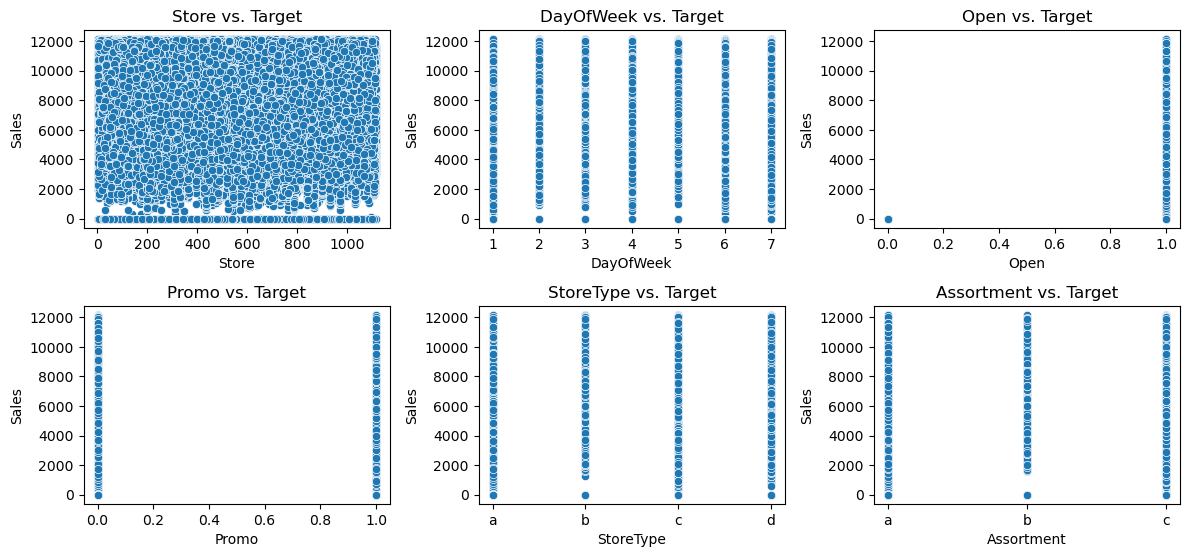

In [370]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plots for each feature vs. the target variable
plt.figure(figsize=(12, 8))
for idx, column in enumerate(X_train.columns, 1):
    plt.subplot(3, 3, idx)
    sns.scatterplot(x=X_train[column], y=y_train)
    plt.title(f'{column} vs. Target')
plt.tight_layout()
plt.show()


In [359]:
#random forest
rf = RandomForestRegressor(n_estimators=500, random_state=42,max_depth=5)

#model pipeline
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('random_forest', rf)
                             ])

# Preprocessing of training data, fit model 
rf_pipe.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
rf_preds = rf_pipe.predict(X_test)

# Evaluate the model
score = mean_absolute_error(y_test, rf_preds)
print('Mean Absolute Error for Random Forest Model', score)

Mean Absolute Error for Random Forest Model 1309.8430893840296


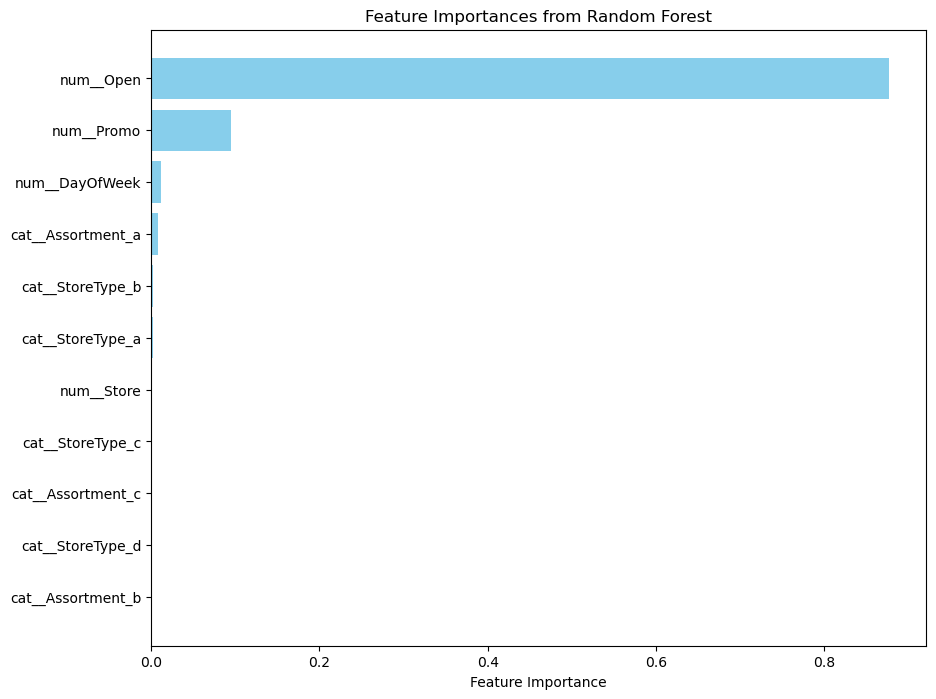

In [366]:
# Access the random forest model from the pipeline
rf_model = rf_pipe.named_steps['random_forest']

# Get feature importances
importances = rf_model.feature_importances_

# Get feature names after preprocessing
feature_names = rf_pipe.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

In [361]:
#test on cross validation
crv_scores = -1 * cross_val_score(rf_pipe, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Mean Absolute Error from Cross Validation", crv_scores)

Mean Absolute Error from Cross Validation [1280.7408723  1333.00156217 1269.57963184 1342.33232468 1347.63087077]


In [362]:
#load in test data

test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
#predict
preds = rf_pipe.predict(test_df)

# Extra stuff

In [ ]:
df.duplicated().value_counts()
df['duplicated'] = df.duplicated() #Create a new feature



In [ ]:
#Exploratory Data Analysis (EDA)
sns.pairplot(df)
sns.distplot(df['column'])
sns.countplot(df['column'])

In [ ]:
#Fix or remove outliers
sns.boxplot(df['feature1'])
sns.boxplot(df['feature2'])

In [ ]:
#Feature engineering. Create new features by transforming the data
#Discretize continuous features
#Decompose features (categorical, date/time, etc.)
#Add promising transformations of features (e.g., log(x), sqrt(x), x^2, etc.)
#Aggregate features into promising new features (x*y)
#For speed/movement data, add vectorial features. Try many different combinations
df['position_norm'] = df['position_X'] ** 2 + df['position_Y'] ** 2 + df['position_Z'] ** 2
df['position_module'] = df['position_norm'] ** 0.5
df['position_norm_X'] = df['position_X'] / df['position_module']
df['position_norm_Y'] = df['position_Y'] / df['position_module']
df['position_norm_Z'] = df['position_Z'] / df['position_module']
df['position_over_velocity'] = df['position_module'] / df['velocity_module']

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

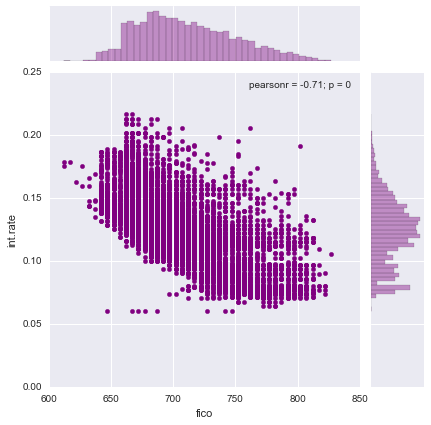

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

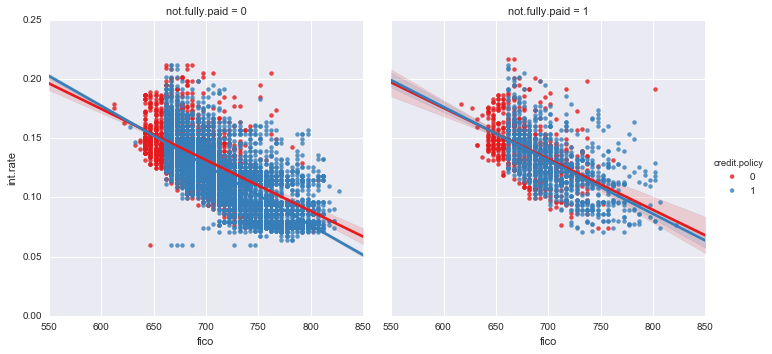

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

## Training a XXX Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [18]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Predictions and Evaluation of XXX Model
**Create predictions from the test set and create a classification report and a confusion matrix.**

             precision    recall  f1-score   support

          0       0.85      0.81      0.83      2431
          1       0.16      0.20      0.18       443

avg / total       0.74      0.72      0.73      2874



[[1980  451]
 [ 355   88]]


## Training the XXX model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.56      0.01      0.02       443

avg / total       0.80      0.85      0.78      2874



**Show the Confusion Matrix for the predictions.**

[[2427    4]
 [ 438    5]]


**What performed better the random forest or the decision tree?**

# Great Job!